# SOI and Recruitment Data Analysis

Taken from *Time Series and its Applications - with R Examples, 3rd ed*:
<table>
    <tr>
        <th>example</th>
        <th>page</th>
        <th>title</th>
    </tr>
    <tr>
        <td>[1.5](#rawdatavis)</td>
        <td>7</td>
        <td style = "text-align: left">El Niño and Fish Population</td>
    </tr>
    <tr>
        <td>1.25</td>
        <td>32</td>
        <td style = "text-align: left">SOI and Recruitment Correlation Analysis</td>
    </tr>
    <tr>
        <td>2.3</td>
        <td>57</td>
        <td style = "text-align: left">Regression With Lagged Variables</td>
    </tr>
    <tr>
        <td>2.7</td>
        <td>64</td>
        <td style = "text-align: left">Scatterplot Matrices, SOI and Recruitment</td>
    </tr>
    <tr>
        <td>3.17</td>
        <td>108</td>
        <td style = "text-align: left">Preliminary Analysis of the Recruitment Series</td>
    </tr>
    <tr>
        <td>3.24</td>
        <td>118</td>
        <td style = "text-align: left">Forecasting the Recruitment Series</td>
    </tr>
    <tr>
        <td>3.27</td>
        <td>123</td>
        <td style = "text-align: left">Yule–Walker Estimation of the Recruitment Series</td>
    </tr>
    <tr>
        <td>3.30</td>
        <td>128</td>
        <td style = "text-align: left">MLE for the Recruitment Series</td>
    </tr>
    <tr>
        <td>4.10</td>
        <td>194</td>
        <td style = "text-align: left">Periodogram of SOI and Recruitment Series</td>
    </tr>
    <tr>
        <td>4.11</td>
        <td>198</td>
        <td style = "text-align: left">Averaged Periodogram for SOI and Recruitment</td>
    </tr>
    <tr>
        <td>4.13</td>
        <td>205</td>
        <td style = "text-align: left">Smoothed Periodogram for SOI and Recruitment</td>
    </tr>
    <tr>
        <td>4.14</td>
        <td>208</td>
        <td style = "text-align: left">The Effect of Tapering the SOI Series</td>
    </tr>
    <tr>
        <td>4.18</td>
        <td>220</td>
        <td style = "text-align: left">Coherence Between SOI and Recruitment</td>
    </tr>
    <tr>
        <td>4.24</td>
        <td>244</td>
        <td style = "text-align: left">Lagged Regression SOI and Recruitment</td>
    </tr>
    <tr>
        <td>5.8</td>
        <td>297</td>
        <td style = "text-align: left">Relating the Prewhitened SOI to the Transformed Reccruitment Series</td>
    </tr>
    <tr>
        <td>5.9</td>
        <td>300</td>
        <td style = "text-align: left">Transfer Function Model for SOI and Recruitment</td>
    </tr>
</table>

## Description of time series

The following are monthly values of an environmental time series called the Southern Oscillation Index (SOI) and associated Recruitment (number of fish). The SOI measures changes in air pressure, related to sea surface temperatures in the central Pacific. It is provided by Dr. Roy Mendelssohn of the Pacific Environmental Fisheries Group. The dataset illustrates how to analyze several time series simultaneously in addition to working with oscillatory data. The dataset has observations corresponding to 453 months, ranging from 1950 to 1987.

## Initalization

Load the ASTSA package:

In [2]:
library(astsa)

## Raw data visualization <a class = "anchor" id = "rawdatavis"></a>

*Taken from ex. 1.5.*

Plot the datasets:

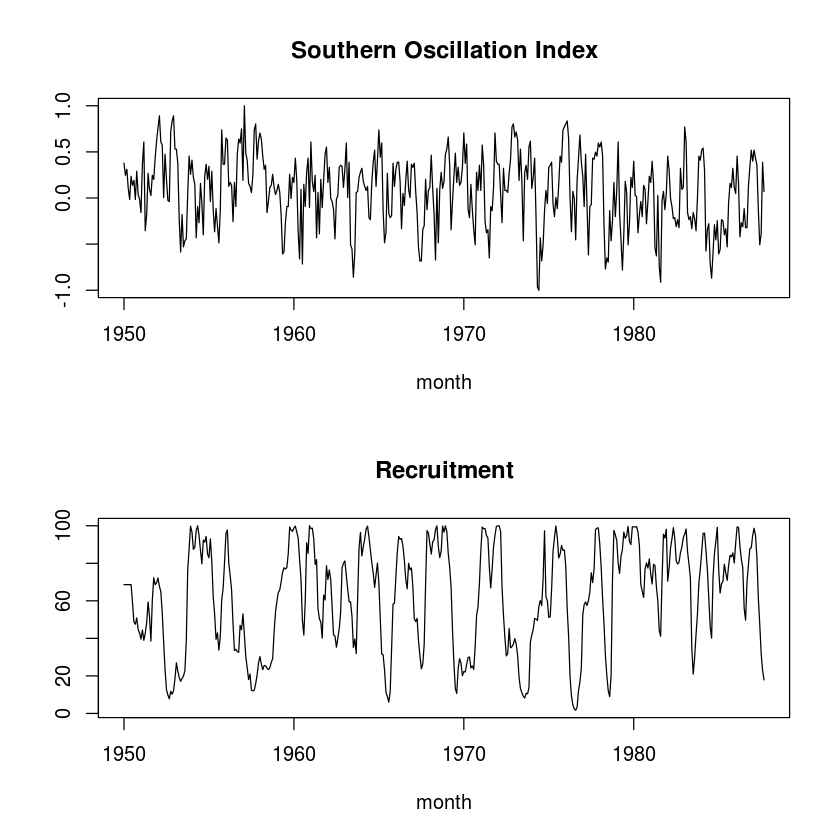

In [3]:
par(mfrow = c(2, 1))
plot(soi, ylab = "", xlab = "month", main = "Southern Oscillation Index")
plot(rec, ylab = "", xlab = "month", main = "Recruitment")

The SOI dataset seems to oscillate at a higher frequency than the Recruitment one. At the same time, the Recruitment dataset seems to be comprised of a combination of a higher frequency and a lower frequency. In addtion, the two series seems to be related. A cluster of lower amplitude oscillations in the SOI seems to correspond in a wavelet peak for Recruitment.

## Correlation analysis

The autocorrelation can be used to determine periodicity in the data:

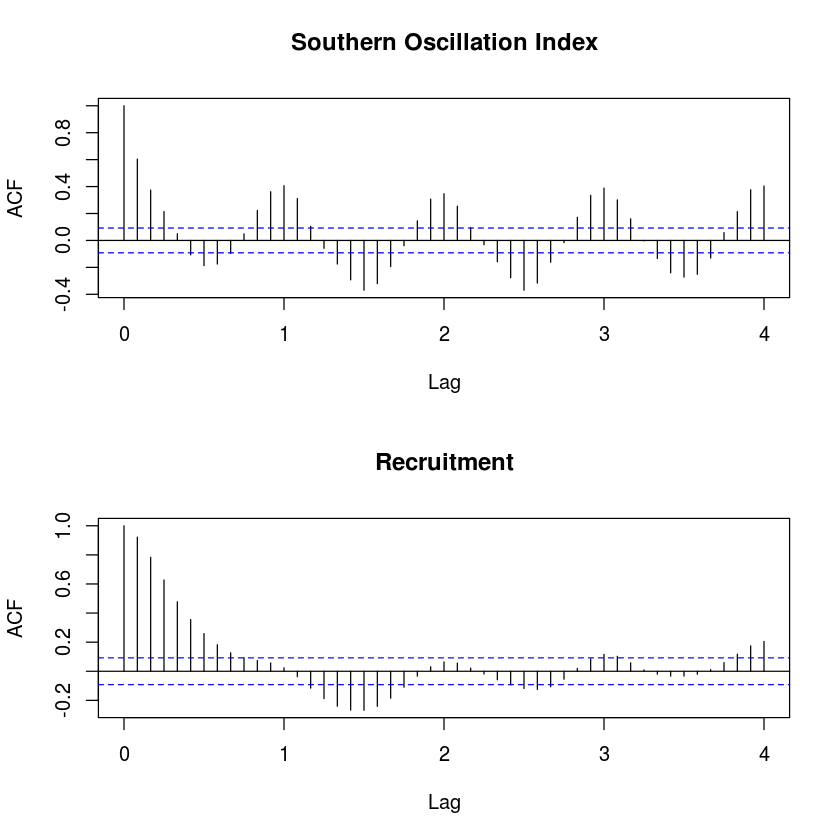

In [5]:
par(mfrow = c(2,1))
acf(soi, 48, main = "Southern Oscillation Index")
acf(rec, 48, main = "Recruitment")

Both ACFs exhibit periodicities. The SOI ACF displays a periodicity separated by a lag of 12, where every 12th value is strongly correlated with the current one. Lags of 6 are negatively correlated. This suggests a periodicity of 12 months for the SOI series, and less strongly for the Recruitment one.

Looking at the cross-correlation:

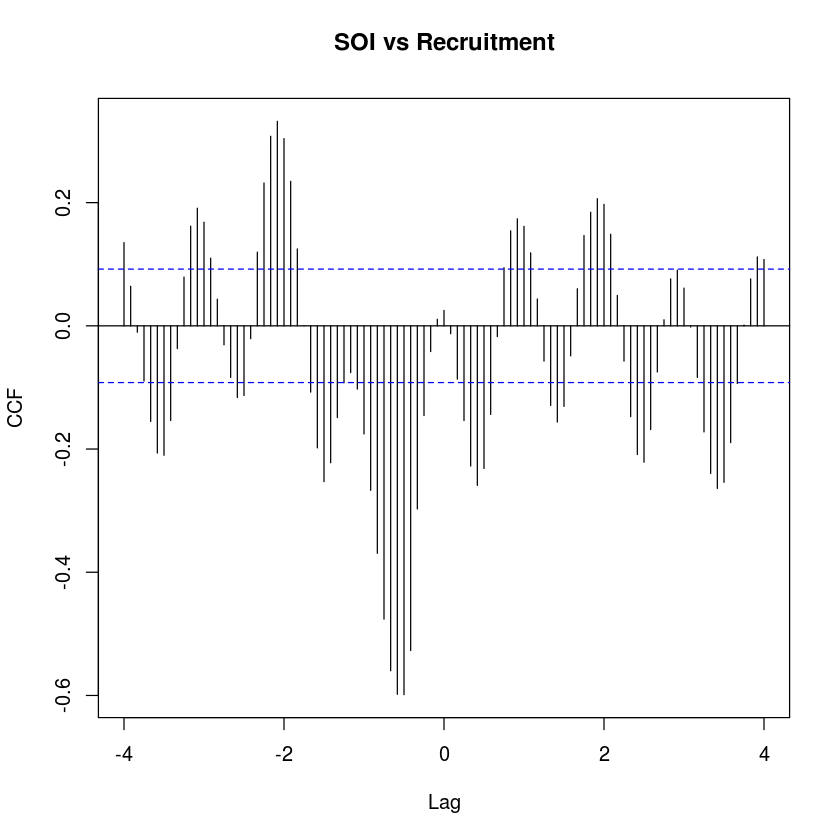

In [6]:
ccf(soi, rec, 48, main = "SOI vs Recruitment", ylab = "CCF")

The CCF point with the greatest magnitude occurs at lag 6, meaning that the SOI measured at $t - 6$ is associated with the current Recruitment value. In other words, SOI leads the Recruitment series by 6 months. Since at lag 6, SOI is negatively correlated with Recruitment, the two series move in different directions.

The dotted blue lines indicate 95% confidence intervals for white noise. If the noise were purely white, they would mostly exist within the bounds from 0 to either of the confidence interval lines.

## Series regression

The following regression can be tried on the Recruitment series, using the SOI lagged by 6 months as a regressor:

\begin{equation}
R_t = \beta_1 + \beta_2 S_{t - 6} + w_t
\end{equation}

Performing the lagged regression:

In [7]:
fish = ts.intersect(rec, soiL6 = lag(soi, -6), dframe = TRUE)
summary(lm(rec~soiL6, data = fish, na.action = NULL))


Call:
lm(formula = rec ~ soiL6, data = fish, na.action = NULL)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.187 -18.234   0.354  16.580  55.790 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   65.790      1.088   60.47   <2e-16 ***
soiL6        -44.283      2.781  -15.92   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.5 on 445 degrees of freedom
Multiple R-squared:  0.3629,	Adjusted R-squared:  0.3615 
F-statistic: 253.5 on 1 and 445 DF,  p-value: < 2.2e-16


We have as an estimated equation:

\begin{equation}
\widehat{R}_t = 65.79 - 44.283 S_{t - 6}
\end{equation}

with $\widehat{\sigma}_w = 22.5$ and $\widehat{\sigma}_{\beta_2} = 2.78$. All of the estimates indicate that the SOI lagged at 6 months strongly predicts the values of the current Recruitment time point.